### t statistics(t_stat) 란? 

모평균에 대한 가설 검정 시, 표본으로부터 얻은 평균이 귀무가설 하에서 

얼마나 떨어져 있는지를 표준 오차 단위로 측정한 값입니다.

즉 추론통계량(inferential statistic)이라고도 할 수 있다.

### 평균,분산,확률에 대한 T_stat

* 표본평균 => N(x_bar, s2/n)
* 표본확률 => N(p, p(1-p)/n)
* 표본분산 => chi2(n-1)을 따른다, (n-1)* 표본분산 / 모분산


### scipy.stats module 을 잘 사용해야함

ttest_1samp(x, popmean, alternative)
* x = data (표본 ex: np.random.choice(25) )
* popmean = 귀무가설에 대한 평균or분산or확률 (모데이터)
* alternative = 검정방법 (two-sided,less,greater)



## 직접 검정을 해보자

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm, t, f, ttest_1samp

In [38]:
x1 = norm.rvs(size = 100)
print(x1[:50])

[-0.66356508  1.10997913  1.34977866 -0.31673754 -0.69255946 -2.57871354
  0.32689779  2.08139966  0.56501407 -0.83602978  0.23468734 -0.05740931
 -0.64733541  1.47101742 -0.50107224  1.32033653  0.35251571  1.15833767
 -2.16793095  0.1427235  -0.34300737  0.79789775 -0.50576595 -0.58959365
 -1.54247305  1.15936293 -0.30476432  0.44484717 -1.95197149 -0.61017123
  2.23889325 -0.9427137   0.32629944  0.43232927 -0.45085099 -0.30974209
 -0.25703559 -0.54797441 -1.58219384  0.99803579  0.19764835 -0.04008969
  0.43354338  0.25146975 -1.04361634  0.10756383 -1.2875399  -0.90716955
  1.10018884  0.12900033]


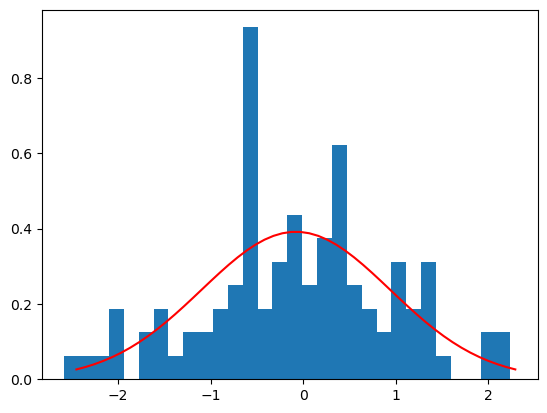

In [39]:
x_axis = np.linspace(norm.ppf(0.01, loc = np.mean(x1), scale=np.std(x1,ddof=1)),
                     norm.ppf(0.99,loc=np.mean(x1), scale=np.std(x1,ddof=1)))
plt.hist(x1, bins=30, density=True) # density=True로 해야 히스토그램 전체면적이 1이됨. (정규분포와 비교할때 사용)
plt.plot(x_axis, norm.pdf(x_axis, loc=np.mean(x1),scale=np.std(x1,ddof=1)),color='red')
plt.show()

### 모평균이 0.5라고 가정하고, alternative = 'two-sided', 유의수준은 0.05라고 하자 

In [40]:
def z_stat(x, popmean, alpha, alternative):
    n = len(x)
    z_value = (np.mean(x) - popmean) / (np.std(x,ddof=1)/np.sqrt(n))
    print("Test statistic : ", z_value)

    if alternative =='two-side':
        print("Reject H0") if np.abs(z_value) > norm.ppf(1-alpha/2) else print('Accept H0')
    elif alternative == 'less':
        print("Reject H0") if z_value < norm.ppf(alpha) else print('Accept H0')
    else:
        print('Reject H0') if z_value > norm.ppf(1-alpha) else print('Accept H0')

z_stat(x1, 0.5, 0.05, 'two-sided')

Test statistic :  -5.670223401861651
Accept H0


In [45]:
t_stat, p_value = ttest_1samp(x1, popmean=0,alternative='less')

print(f"t statistics : {np.round(t_stat,4)} p_value : {np.round(p_value,4)}")

t statistics : -0.7642 p_value : 0.2233


In [44]:
t_stat, p_value = ttest_1samp(x1, popmean=0,alternative='greater')

print(f"t statistics : {np.round(t_stat,4)} p_value : {np.round(p_value,4)}")

t statistics : -0.7642 p_value : 0.7767


In [46]:
t_stat, p_value = ttest_1samp(x1, popmean=0,alternative='two-sided')

print(f"t statistics : {np.round(t_stat,4)} p_value : {np.round(p_value,4)}")

t statistics : -0.7642 p_value : 0.4466
